In [2]:
%pip install pandas torch tqdm matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("../classification_breast_cancer_data.csv")

selected_feature = [
    "Age",
    "Tumor Size",
    "Node Positive Ratio",
    "N Stage Encoded",
    "Estrogen Status Encoded",
    "Progesterone Status Encoded",
]
# X = df.drop(columns=["Survival More Than 6 Years"]).values
X = df[selected_feature].values
y = df["Survival More Than 6 Years"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, output_dim),
        )

    def forward(self, x):
        return self.layer(x)

In [6]:
def train(model, train_loader, criterion, optimizer, epochs=50):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_acc = 0
        train_loss = 0

        for X_batch, y_batch in tqdm(
            train_loader, desc=f"Epoch {epoch + 1}/{epochs} - Training"
        ):
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == y_batch).sum().item()

        avg_train_loss = train_loss / len(train_dataset)
        avg_train_acc = train_acc / len(train_dataset)

        train_losses.append(avg_train_loss)
        train_accuracies.append(avg_train_acc)

        model.eval()
        val_acc = 0
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in tqdm(
                test_loader, desc=f"Epoch {epoch + 1}/{epochs} - Validation"
            ):
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_acc += (predicted == y_batch).sum().item()

        avg_val_loss = val_loss / len(test_dataset)
        avg_val_acc = val_acc / len(test_dataset)
        val_losses.append(avg_val_loss)
        val_accuracies.append(avg_val_acc)

        print(
            f"Epoch {epoch + 1}/{epochs} - "
            f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, "
            f"Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}"
        )

    return train_losses, train_accuracies, val_losses, val_accuracies

In [7]:
model = MLP(input_dim=X_train_tensor.shape[1], output_dim=2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 200

train_losses, train_accuracies, val_losses, val_accuracies = train(
    model, train_loader, criterion, optimizer, epochs=epochs
)

Epoch 1/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4281.92it/s]


Epoch 1/200 - Train Loss: 0.0218, Train Acc: 0.5138, Val Loss: 0.0222, Val Acc: 0.5404


Epoch 2/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4446.02it/s]


Epoch 2/200 - Train Loss: 0.0216, Train Acc: 0.5349, Val Loss: 0.0222, Val Acc: 0.5379


Epoch 3/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4465.86it/s]


Epoch 3/200 - Train Loss: 0.0217, Train Acc: 0.5247, Val Loss: 0.0223, Val Acc: 0.5329


Epoch 4/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4544.59it/s]


Epoch 4/200 - Train Loss: 0.0216, Train Acc: 0.5200, Val Loss: 0.0222, Val Acc: 0.5491


Epoch 5/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4299.65it/s]


Epoch 5/200 - Train Loss: 0.0216, Train Acc: 0.5446, Val Loss: 0.0221, Val Acc: 0.5553


Epoch 6/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4584.90it/s]


Epoch 6/200 - Train Loss: 0.0216, Train Acc: 0.5362, Val Loss: 0.0223, Val Acc: 0.5366


Epoch 7/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4646.04it/s]


Epoch 7/200 - Train Loss: 0.0215, Train Acc: 0.5362, Val Loss: 0.0221, Val Acc: 0.5441


Epoch 8/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4576.63it/s]


Epoch 8/200 - Train Loss: 0.0216, Train Acc: 0.5368, Val Loss: 0.0222, Val Acc: 0.5317


Epoch 9/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4496.06it/s]


Epoch 9/200 - Train Loss: 0.0216, Train Acc: 0.5405, Val Loss: 0.0222, Val Acc: 0.5317


Epoch 10/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4345.74it/s]


Epoch 10/200 - Train Loss: 0.0216, Train Acc: 0.5272, Val Loss: 0.0221, Val Acc: 0.5267


Epoch 11/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4510.19it/s]


Epoch 11/200 - Train Loss: 0.0216, Train Acc: 0.5325, Val Loss: 0.0221, Val Acc: 0.5516


Epoch 12/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4418.81it/s]


Epoch 12/200 - Train Loss: 0.0215, Train Acc: 0.5455, Val Loss: 0.0222, Val Acc: 0.5329


Epoch 13/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4433.00it/s]


Epoch 13/200 - Train Loss: 0.0215, Train Acc: 0.5455, Val Loss: 0.0222, Val Acc: 0.5329


Epoch 14/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4108.04it/s]


Epoch 14/200 - Train Loss: 0.0215, Train Acc: 0.5359, Val Loss: 0.0223, Val Acc: 0.5466


Epoch 15/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4515.42it/s]


Epoch 15/200 - Train Loss: 0.0215, Train Acc: 0.5368, Val Loss: 0.0222, Val Acc: 0.5466


Epoch 16/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4495.32it/s]


Epoch 16/200 - Train Loss: 0.0215, Train Acc: 0.5461, Val Loss: 0.0222, Val Acc: 0.5441


Epoch 17/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4598.63it/s]


Epoch 17/200 - Train Loss: 0.0215, Train Acc: 0.5461, Val Loss: 0.0222, Val Acc: 0.5242


Epoch 18/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3132.15it/s]


Epoch 18/200 - Train Loss: 0.0215, Train Acc: 0.5390, Val Loss: 0.0221, Val Acc: 0.5429


Epoch 19/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4075.18it/s]


Epoch 19/200 - Train Loss: 0.0215, Train Acc: 0.5405, Val Loss: 0.0222, Val Acc: 0.5366


Epoch 20/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4472.64it/s]


Epoch 20/200 - Train Loss: 0.0215, Train Acc: 0.5492, Val Loss: 0.0222, Val Acc: 0.5416


Epoch 21/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4568.58it/s]


Epoch 21/200 - Train Loss: 0.0215, Train Acc: 0.5464, Val Loss: 0.0222, Val Acc: 0.5466


Epoch 22/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4637.94it/s]


Epoch 22/200 - Train Loss: 0.0215, Train Acc: 0.5461, Val Loss: 0.0222, Val Acc: 0.5255


Epoch 23/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4399.38it/s]


Epoch 23/200 - Train Loss: 0.0215, Train Acc: 0.5502, Val Loss: 0.0222, Val Acc: 0.5503


Epoch 24/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4304.57it/s]


Epoch 24/200 - Train Loss: 0.0215, Train Acc: 0.5415, Val Loss: 0.0222, Val Acc: 0.5366


Epoch 25/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4251.04it/s]


Epoch 25/200 - Train Loss: 0.0215, Train Acc: 0.5536, Val Loss: 0.0222, Val Acc: 0.5391


Epoch 26/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4067.58it/s]


Epoch 26/200 - Train Loss: 0.0214, Train Acc: 0.5349, Val Loss: 0.0222, Val Acc: 0.5466


Epoch 27/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4535.14it/s]


Epoch 27/200 - Train Loss: 0.0214, Train Acc: 0.5461, Val Loss: 0.0223, Val Acc: 0.5391


Epoch 28/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4358.76it/s]


Epoch 28/200 - Train Loss: 0.0214, Train Acc: 0.5555, Val Loss: 0.0222, Val Acc: 0.5230


Epoch 29/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4291.19it/s]


Epoch 29/200 - Train Loss: 0.0215, Train Acc: 0.5433, Val Loss: 0.0222, Val Acc: 0.5453


Epoch 30/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4326.25it/s]


Epoch 30/200 - Train Loss: 0.0214, Train Acc: 0.5362, Val Loss: 0.0222, Val Acc: 0.5602


Epoch 31/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4056.24it/s]


Epoch 31/200 - Train Loss: 0.0214, Train Acc: 0.5545, Val Loss: 0.0223, Val Acc: 0.5441


Epoch 32/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4475.03it/s]


Epoch 32/200 - Train Loss: 0.0214, Train Acc: 0.5533, Val Loss: 0.0222, Val Acc: 0.5491


Epoch 33/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4535.14it/s]


Epoch 33/200 - Train Loss: 0.0215, Train Acc: 0.5418, Val Loss: 0.0222, Val Acc: 0.5379


Epoch 34/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4472.64it/s]


Epoch 34/200 - Train Loss: 0.0215, Train Acc: 0.5561, Val Loss: 0.0222, Val Acc: 0.5640


Epoch 35/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4564.75it/s]


Epoch 35/200 - Train Loss: 0.0214, Train Acc: 0.5523, Val Loss: 0.0223, Val Acc: 0.5553


Epoch 36/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4584.71it/s]


Epoch 36/200 - Train Loss: 0.0215, Train Acc: 0.5492, Val Loss: 0.0223, Val Acc: 0.5503


Epoch 37/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4741.18it/s]


Epoch 37/200 - Train Loss: 0.0214, Train Acc: 0.5610, Val Loss: 0.0222, Val Acc: 0.5453


Epoch 38/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4443.48it/s]


Epoch 38/200 - Train Loss: 0.0214, Train Acc: 0.5567, Val Loss: 0.0222, Val Acc: 0.5540


Epoch 39/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4501.25it/s]


Epoch 39/200 - Train Loss: 0.0214, Train Acc: 0.5471, Val Loss: 0.0222, Val Acc: 0.5516


Epoch 40/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4840.51it/s]


Epoch 40/200 - Train Loss: 0.0213, Train Acc: 0.5645, Val Loss: 0.0223, Val Acc: 0.5528


Epoch 41/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4329.00it/s]


Epoch 41/200 - Train Loss: 0.0214, Train Acc: 0.5508, Val Loss: 0.0224, Val Acc: 0.5329


Epoch 42/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4677.13it/s]


Epoch 42/200 - Train Loss: 0.0214, Train Acc: 0.5592, Val Loss: 0.0224, Val Acc: 0.5503


Epoch 43/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4426.35it/s]


Epoch 43/200 - Train Loss: 0.0214, Train Acc: 0.5499, Val Loss: 0.0223, Val Acc: 0.5453


Epoch 44/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4532.50it/s]


Epoch 44/200 - Train Loss: 0.0214, Train Acc: 0.5620, Val Loss: 0.0224, Val Acc: 0.5491


Epoch 45/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4791.81it/s]


Epoch 45/200 - Train Loss: 0.0214, Train Acc: 0.5412, Val Loss: 0.0223, Val Acc: 0.5478


Epoch 46/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4537.40it/s]


Epoch 46/200 - Train Loss: 0.0213, Train Acc: 0.5545, Val Loss: 0.0223, Val Acc: 0.5578


Epoch 47/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4315.13it/s]


Epoch 47/200 - Train Loss: 0.0214, Train Acc: 0.5545, Val Loss: 0.0223, Val Acc: 0.5640


Epoch 48/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4577.40it/s]


Epoch 48/200 - Train Loss: 0.0214, Train Acc: 0.5558, Val Loss: 0.0223, Val Acc: 0.5553


Epoch 49/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4646.24it/s]


Epoch 49/200 - Train Loss: 0.0213, Train Acc: 0.5461, Val Loss: 0.0224, Val Acc: 0.5478


Epoch 50/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4513.92it/s]


Epoch 50/200 - Train Loss: 0.0213, Train Acc: 0.5579, Val Loss: 0.0224, Val Acc: 0.5342


Epoch 51/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5045.43it/s]


Epoch 51/200 - Train Loss: 0.0213, Train Acc: 0.5629, Val Loss: 0.0224, Val Acc: 0.5478


Epoch 52/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4666.32it/s]


Epoch 52/200 - Train Loss: 0.0213, Train Acc: 0.5598, Val Loss: 0.0224, Val Acc: 0.5528


Epoch 53/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4690.81it/s]


Epoch 53/200 - Train Loss: 0.0213, Train Acc: 0.5660, Val Loss: 0.0224, Val Acc: 0.5230


Epoch 54/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5348.57it/s]


Epoch 54/200 - Train Loss: 0.0214, Train Acc: 0.5495, Val Loss: 0.0224, Val Acc: 0.5516


Epoch 55/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4646.24it/s]


Epoch 55/200 - Train Loss: 0.0213, Train Acc: 0.5617, Val Loss: 0.0224, Val Acc: 0.5528


Epoch 56/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4448.19it/s]


Epoch 56/200 - Train Loss: 0.0213, Train Acc: 0.5623, Val Loss: 0.0224, Val Acc: 0.5528


Epoch 57/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4404.54it/s]


Epoch 57/200 - Train Loss: 0.0212, Train Acc: 0.5610, Val Loss: 0.0224, Val Acc: 0.5602


Epoch 58/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4070.62it/s]


Epoch 58/200 - Train Loss: 0.0213, Train Acc: 0.5629, Val Loss: 0.0223, Val Acc: 0.5466


Epoch 59/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4755.86it/s]


Epoch 59/200 - Train Loss: 0.0213, Train Acc: 0.5685, Val Loss: 0.0223, Val Acc: 0.5727


Epoch 60/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4414.16it/s]


Epoch 60/200 - Train Loss: 0.0214, Train Acc: 0.5645, Val Loss: 0.0224, Val Acc: 0.5615


Epoch 61/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4394.60it/s]


Epoch 61/200 - Train Loss: 0.0213, Train Acc: 0.5673, Val Loss: 0.0224, Val Acc: 0.5391


Epoch 62/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4506.09it/s]


Epoch 62/200 - Train Loss: 0.0213, Train Acc: 0.5623, Val Loss: 0.0224, Val Acc: 0.5602


Epoch 63/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4622.02it/s]


Epoch 63/200 - Train Loss: 0.0213, Train Acc: 0.5573, Val Loss: 0.0225, Val Acc: 0.5379


Epoch 64/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4882.56it/s]


Epoch 64/200 - Train Loss: 0.0212, Train Acc: 0.5645, Val Loss: 0.0224, Val Acc: 0.5391


Epoch 65/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4505.16it/s]


Epoch 65/200 - Train Loss: 0.0212, Train Acc: 0.5629, Val Loss: 0.0224, Val Acc: 0.5404


Epoch 66/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4372.57it/s]


Epoch 66/200 - Train Loss: 0.0213, Train Acc: 0.5505, Val Loss: 0.0224, Val Acc: 0.5503


Epoch 67/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4636.36it/s]


Epoch 67/200 - Train Loss: 0.0213, Train Acc: 0.5607, Val Loss: 0.0224, Val Acc: 0.5416


Epoch 68/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4420.43it/s]


Epoch 68/200 - Train Loss: 0.0212, Train Acc: 0.5704, Val Loss: 0.0225, Val Acc: 0.5441


Epoch 69/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4799.82it/s]


Epoch 69/200 - Train Loss: 0.0213, Train Acc: 0.5642, Val Loss: 0.0224, Val Acc: 0.5590


Epoch 70/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4530.43it/s]


Epoch 70/200 - Train Loss: 0.0212, Train Acc: 0.5701, Val Loss: 0.0224, Val Acc: 0.5528


Epoch 71/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4272.19it/s]


Epoch 71/200 - Train Loss: 0.0212, Train Acc: 0.5691, Val Loss: 0.0224, Val Acc: 0.5528


Epoch 72/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4396.19it/s]


Epoch 72/200 - Train Loss: 0.0213, Train Acc: 0.5645, Val Loss: 0.0224, Val Acc: 0.5565


Epoch 73/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4881.90it/s]


Epoch 73/200 - Train Loss: 0.0213, Train Acc: 0.5617, Val Loss: 0.0225, Val Acc: 0.5366


Epoch 74/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4309.67it/s]


Epoch 74/200 - Train Loss: 0.0212, Train Acc: 0.5704, Val Loss: 0.0224, Val Acc: 0.5491


Epoch 75/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4716.17it/s]


Epoch 75/200 - Train Loss: 0.0211, Train Acc: 0.5666, Val Loss: 0.0225, Val Acc: 0.5516


Epoch 76/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4459.65it/s]


Epoch 76/200 - Train Loss: 0.0213, Train Acc: 0.5713, Val Loss: 0.0224, Val Acc: 0.5329


Epoch 77/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4803.20it/s]


Epoch 77/200 - Train Loss: 0.0213, Train Acc: 0.5657, Val Loss: 0.0225, Val Acc: 0.5379


Epoch 78/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4636.17it/s]


Epoch 78/200 - Train Loss: 0.0212, Train Acc: 0.5831, Val Loss: 0.0224, Val Acc: 0.5627


Epoch 79/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4649.41it/s]


Epoch 79/200 - Train Loss: 0.0211, Train Acc: 0.5691, Val Loss: 0.0225, Val Acc: 0.5466


Epoch 80/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4586.25it/s]


Epoch 80/200 - Train Loss: 0.0212, Train Acc: 0.5632, Val Loss: 0.0224, Val Acc: 0.5590


Epoch 81/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4061.37it/s]


Epoch 81/200 - Train Loss: 0.0212, Train Acc: 0.5676, Val Loss: 0.0224, Val Acc: 0.5578


Epoch 82/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4514.67it/s]


Epoch 82/200 - Train Loss: 0.0211, Train Acc: 0.5701, Val Loss: 0.0224, Val Acc: 0.5491


Epoch 83/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4556.55it/s]


Epoch 83/200 - Train Loss: 0.0212, Train Acc: 0.5753, Val Loss: 0.0225, Val Acc: 0.5578


Epoch 84/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4506.09it/s]


Epoch 84/200 - Train Loss: 0.0211, Train Acc: 0.5744, Val Loss: 0.0225, Val Acc: 0.5441


Epoch 85/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4519.54it/s]


Epoch 85/200 - Train Loss: 0.0211, Train Acc: 0.5657, Val Loss: 0.0225, Val Acc: 0.5391


Epoch 86/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4495.13it/s]


Epoch 86/200 - Train Loss: 0.0211, Train Acc: 0.5632, Val Loss: 0.0225, Val Acc: 0.5578


Epoch 87/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4557.31it/s]


Epoch 87/200 - Train Loss: 0.0212, Train Acc: 0.5719, Val Loss: 0.0224, Val Acc: 0.5590


Epoch 88/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4339.17it/s]


Epoch 88/200 - Train Loss: 0.0212, Train Acc: 0.5561, Val Loss: 0.0224, Val Acc: 0.5677


Epoch 89/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4161.49it/s]


Epoch 89/200 - Train Loss: 0.0211, Train Acc: 0.5617, Val Loss: 0.0224, Val Acc: 0.5553


Epoch 90/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4566.28it/s]


Epoch 90/200 - Train Loss: 0.0211, Train Acc: 0.5657, Val Loss: 0.0225, Val Acc: 0.5627


Epoch 91/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4885.40it/s]


Epoch 91/200 - Train Loss: 0.0212, Train Acc: 0.5682, Val Loss: 0.0225, Val Acc: 0.5491


Epoch 92/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4351.46it/s]


Epoch 92/200 - Train Loss: 0.0212, Train Acc: 0.5781, Val Loss: 0.0225, Val Acc: 0.5540


Epoch 93/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4366.79it/s]


Epoch 93/200 - Train Loss: 0.0211, Train Acc: 0.5626, Val Loss: 0.0225, Val Acc: 0.5553


Epoch 94/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4405.96it/s]


Epoch 94/200 - Train Loss: 0.0212, Train Acc: 0.5710, Val Loss: 0.0225, Val Acc: 0.5429


Epoch 95/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4510.00it/s]


Epoch 95/200 - Train Loss: 0.0211, Train Acc: 0.5691, Val Loss: 0.0225, Val Acc: 0.5416


Epoch 96/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5201.12it/s]


Epoch 96/200 - Train Loss: 0.0211, Train Acc: 0.5701, Val Loss: 0.0226, Val Acc: 0.5379


Epoch 97/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3896.24it/s]


Epoch 97/200 - Train Loss: 0.0211, Train Acc: 0.5738, Val Loss: 0.0224, Val Acc: 0.5416


Epoch 98/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4436.79it/s]


Epoch 98/200 - Train Loss: 0.0211, Train Acc: 0.5760, Val Loss: 0.0225, Val Acc: 0.5590


Epoch 99/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4544.78it/s]


Epoch 99/200 - Train Loss: 0.0211, Train Acc: 0.5725, Val Loss: 0.0224, Val Acc: 0.5739


Epoch 100/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4674.52it/s]


Epoch 100/200 - Train Loss: 0.0211, Train Acc: 0.5809, Val Loss: 0.0226, Val Acc: 0.5429


Epoch 101/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4475.03it/s]


Epoch 101/200 - Train Loss: 0.0211, Train Acc: 0.5682, Val Loss: 0.0226, Val Acc: 0.5503


Epoch 102/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4267.34it/s]


Epoch 102/200 - Train Loss: 0.0210, Train Acc: 0.5663, Val Loss: 0.0226, Val Acc: 0.5540


Epoch 103/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4633.80it/s]


Epoch 103/200 - Train Loss: 0.0211, Train Acc: 0.5642, Val Loss: 0.0225, Val Acc: 0.5466


Epoch 104/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4299.65it/s]


Epoch 104/200 - Train Loss: 0.0210, Train Acc: 0.5701, Val Loss: 0.0225, Val Acc: 0.5329


Epoch 105/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4610.88it/s]


Epoch 105/200 - Train Loss: 0.0211, Train Acc: 0.5769, Val Loss: 0.0226, Val Acc: 0.5441


Epoch 106/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4634.59it/s]


Epoch 106/200 - Train Loss: 0.0211, Train Acc: 0.5607, Val Loss: 0.0227, Val Acc: 0.5416


Epoch 107/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4263.67it/s]


Epoch 107/200 - Train Loss: 0.0211, Train Acc: 0.5614, Val Loss: 0.0227, Val Acc: 0.5429


Epoch 108/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4458.74it/s]


Epoch 108/200 - Train Loss: 0.0210, Train Acc: 0.5679, Val Loss: 0.0227, Val Acc: 0.5453


Epoch 109/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4531.37it/s]


Epoch 109/200 - Train Loss: 0.0210, Train Acc: 0.5738, Val Loss: 0.0226, Val Acc: 0.5528


Epoch 110/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4470.44it/s]


Epoch 110/200 - Train Loss: 0.0211, Train Acc: 0.5756, Val Loss: 0.0226, Val Acc: 0.5528


Epoch 111/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4482.01it/s]


Epoch 111/200 - Train Loss: 0.0211, Train Acc: 0.5753, Val Loss: 0.0227, Val Acc: 0.5516


Epoch 112/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4498.28it/s]


Epoch 112/200 - Train Loss: 0.0211, Train Acc: 0.5716, Val Loss: 0.0227, Val Acc: 0.5516


Epoch 113/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4755.65it/s]


Epoch 113/200 - Train Loss: 0.0210, Train Acc: 0.5691, Val Loss: 0.0227, Val Acc: 0.5466


Epoch 114/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4722.09it/s]


Epoch 114/200 - Train Loss: 0.0210, Train Acc: 0.5763, Val Loss: 0.0228, Val Acc: 0.5267


Epoch 115/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4529.49it/s]


Epoch 115/200 - Train Loss: 0.0212, Train Acc: 0.5660, Val Loss: 0.0226, Val Acc: 0.5441


Epoch 116/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4596.11it/s]


Epoch 116/200 - Train Loss: 0.0210, Train Acc: 0.5840, Val Loss: 0.0226, Val Acc: 0.5478


Epoch 117/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4688.19it/s]


Epoch 117/200 - Train Loss: 0.0210, Train Acc: 0.5896, Val Loss: 0.0228, Val Acc: 0.5491


Epoch 118/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4385.05it/s]


Epoch 118/200 - Train Loss: 0.0210, Train Acc: 0.5760, Val Loss: 0.0226, Val Acc: 0.5478


Epoch 119/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4579.13it/s]


Epoch 119/200 - Train Loss: 0.0211, Train Acc: 0.5666, Val Loss: 0.0226, Val Acc: 0.5503


Epoch 120/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3463.50it/s]


Epoch 120/200 - Train Loss: 0.0209, Train Acc: 0.5766, Val Loss: 0.0227, Val Acc: 0.5391


Epoch 121/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4444.39it/s]


Epoch 121/200 - Train Loss: 0.0210, Train Acc: 0.5874, Val Loss: 0.0227, Val Acc: 0.5416


Epoch 122/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4485.15it/s]


Epoch 122/200 - Train Loss: 0.0210, Train Acc: 0.5791, Val Loss: 0.0227, Val Acc: 0.5453


Epoch 123/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4544.78it/s]


Epoch 123/200 - Train Loss: 0.0210, Train Acc: 0.5735, Val Loss: 0.0226, Val Acc: 0.5329


Epoch 124/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4645.45it/s]


Epoch 124/200 - Train Loss: 0.0209, Train Acc: 0.5769, Val Loss: 0.0228, Val Acc: 0.5342


Epoch 125/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4523.29it/s]


Epoch 125/200 - Train Loss: 0.0211, Train Acc: 0.5753, Val Loss: 0.0226, Val Acc: 0.5416


Epoch 126/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4718.61it/s]


Epoch 126/200 - Train Loss: 0.0209, Train Acc: 0.5778, Val Loss: 0.0228, Val Acc: 0.5391


Epoch 127/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4242.27it/s]


Epoch 127/200 - Train Loss: 0.0210, Train Acc: 0.5831, Val Loss: 0.0228, Val Acc: 0.5342


Epoch 128/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4124.97it/s]


Epoch 128/200 - Train Loss: 0.0210, Train Acc: 0.5728, Val Loss: 0.0226, Val Acc: 0.5615


Epoch 129/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4606.01it/s]


Epoch 129/200 - Train Loss: 0.0210, Train Acc: 0.5781, Val Loss: 0.0227, Val Acc: 0.5491


Epoch 130/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4840.73it/s]


Epoch 130/200 - Train Loss: 0.0210, Train Acc: 0.5871, Val Loss: 0.0226, Val Acc: 0.5478


Epoch 131/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4682.35it/s]


Epoch 131/200 - Train Loss: 0.0208, Train Acc: 0.5843, Val Loss: 0.0227, Val Acc: 0.5441


Epoch 132/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4644.66it/s]


Epoch 132/200 - Train Loss: 0.0209, Train Acc: 0.5791, Val Loss: 0.0227, Val Acc: 0.5478


Epoch 133/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4508.51it/s]


Epoch 133/200 - Train Loss: 0.0209, Train Acc: 0.5831, Val Loss: 0.0227, Val Acc: 0.5516


Epoch 134/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4940.06it/s]


Epoch 134/200 - Train Loss: 0.0210, Train Acc: 0.5688, Val Loss: 0.0227, Val Acc: 0.5466


Epoch 135/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4358.07it/s]


Epoch 135/200 - Train Loss: 0.0210, Train Acc: 0.5697, Val Loss: 0.0227, Val Acc: 0.5528


Epoch 136/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4061.98it/s]


Epoch 136/200 - Train Loss: 0.0208, Train Acc: 0.5878, Val Loss: 0.0227, Val Acc: 0.5416


Epoch 137/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4621.43it/s]


Epoch 137/200 - Train Loss: 0.0209, Train Acc: 0.5797, Val Loss: 0.0227, Val Acc: 0.5280


Epoch 138/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4866.22it/s]


Epoch 138/200 - Train Loss: 0.0209, Train Acc: 0.5753, Val Loss: 0.0228, Val Acc: 0.5379


Epoch 139/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 5119.09it/s]


Epoch 139/200 - Train Loss: 0.0210, Train Acc: 0.5732, Val Loss: 0.0227, Val Acc: 0.5366


Epoch 140/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4845.46it/s]


Epoch 140/200 - Train Loss: 0.0209, Train Acc: 0.5809, Val Loss: 0.0227, Val Acc: 0.5366


Epoch 141/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4472.64it/s]


Epoch 141/200 - Train Loss: 0.0209, Train Acc: 0.5856, Val Loss: 0.0227, Val Acc: 0.5429


Epoch 142/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4529.67it/s]


Epoch 142/200 - Train Loss: 0.0209, Train Acc: 0.5837, Val Loss: 0.0226, Val Acc: 0.5503


Epoch 143/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4318.20it/s]


Epoch 143/200 - Train Loss: 0.0209, Train Acc: 0.5701, Val Loss: 0.0227, Val Acc: 0.5528


Epoch 144/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4830.86it/s]


Epoch 144/200 - Train Loss: 0.0209, Train Acc: 0.5825, Val Loss: 0.0226, Val Acc: 0.5429


Epoch 145/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4589.53it/s]


Epoch 145/200 - Train Loss: 0.0209, Train Acc: 0.5697, Val Loss: 0.0226, Val Acc: 0.5453


Epoch 146/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4606.59it/s]


Epoch 146/200 - Train Loss: 0.0209, Train Acc: 0.5828, Val Loss: 0.0228, Val Acc: 0.5578


Epoch 147/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4659.54it/s]


Epoch 147/200 - Train Loss: 0.0208, Train Acc: 0.5725, Val Loss: 0.0229, Val Acc: 0.5516


Epoch 148/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3518.71it/s]


Epoch 148/200 - Train Loss: 0.0208, Train Acc: 0.5840, Val Loss: 0.0229, Val Acc: 0.5503


Epoch 149/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4489.77it/s]


Epoch 149/200 - Train Loss: 0.0209, Train Acc: 0.5878, Val Loss: 0.0228, Val Acc: 0.5478


Epoch 150/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4597.66it/s]


Epoch 150/200 - Train Loss: 0.0209, Train Acc: 0.5673, Val Loss: 0.0227, Val Acc: 0.5491


Epoch 151/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4385.05it/s]


Epoch 151/200 - Train Loss: 0.0209, Train Acc: 0.5893, Val Loss: 0.0228, Val Acc: 0.5491


Epoch 152/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3882.37it/s]


Epoch 152/200 - Train Loss: 0.0209, Train Acc: 0.5840, Val Loss: 0.0228, Val Acc: 0.5466


Epoch 153/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4651.00it/s]


Epoch 153/200 - Train Loss: 0.0209, Train Acc: 0.5803, Val Loss: 0.0229, Val Acc: 0.5516


Epoch 154/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4640.31it/s]


Epoch 154/200 - Train Loss: 0.0209, Train Acc: 0.5868, Val Loss: 0.0228, Val Acc: 0.5391


Epoch 155/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4735.83it/s]


Epoch 155/200 - Train Loss: 0.0210, Train Acc: 0.5784, Val Loss: 0.0228, Val Acc: 0.5491


Epoch 156/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4871.43it/s]


Epoch 156/200 - Train Loss: 0.0209, Train Acc: 0.5831, Val Loss: 0.0229, Val Acc: 0.5342


Epoch 157/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4755.03it/s]


Epoch 157/200 - Train Loss: 0.0208, Train Acc: 0.5865, Val Loss: 0.0229, Val Acc: 0.5478


Epoch 158/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4635.58it/s]


Epoch 158/200 - Train Loss: 0.0208, Train Acc: 0.5865, Val Loss: 0.0228, Val Acc: 0.5441


Epoch 159/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4375.03it/s]


Epoch 159/200 - Train Loss: 0.0208, Train Acc: 0.5741, Val Loss: 0.0229, Val Acc: 0.5491


Epoch 160/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4618.89it/s]


Epoch 160/200 - Train Loss: 0.0209, Train Acc: 0.5791, Val Loss: 0.0228, Val Acc: 0.5416


Epoch 161/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4252.70it/s]


Epoch 161/200 - Train Loss: 0.0209, Train Acc: 0.5753, Val Loss: 0.0228, Val Acc: 0.5565


Epoch 162/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4509.26it/s]


Epoch 162/200 - Train Loss: 0.0208, Train Acc: 0.5881, Val Loss: 0.0229, Val Acc: 0.5578


Epoch 163/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4370.29it/s]


Epoch 163/200 - Train Loss: 0.0208, Train Acc: 0.5943, Val Loss: 0.0230, Val Acc: 0.5528


Epoch 164/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4704.16it/s]


Epoch 164/200 - Train Loss: 0.0208, Train Acc: 0.5843, Val Loss: 0.0228, Val Acc: 0.5453


Epoch 165/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4450.55it/s]


Epoch 165/200 - Train Loss: 0.0209, Train Acc: 0.5763, Val Loss: 0.0229, Val Acc: 0.5491


Epoch 166/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4562.27it/s]


Epoch 166/200 - Train Loss: 0.0207, Train Acc: 0.5884, Val Loss: 0.0229, Val Acc: 0.5528


Epoch 167/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4331.07it/s]


Epoch 167/200 - Train Loss: 0.0208, Train Acc: 0.5847, Val Loss: 0.0229, Val Acc: 0.5553


Epoch 168/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4627.31it/s]


Epoch 168/200 - Train Loss: 0.0208, Train Acc: 0.5803, Val Loss: 0.0227, Val Acc: 0.5565


Epoch 169/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4454.37it/s]


Epoch 169/200 - Train Loss: 0.0207, Train Acc: 0.5809, Val Loss: 0.0228, Val Acc: 0.5590


Epoch 170/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4394.95it/s]


Epoch 170/200 - Train Loss: 0.0207, Train Acc: 0.5859, Val Loss: 0.0229, Val Acc: 0.5466


Epoch 171/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3791.79it/s]


Epoch 171/200 - Train Loss: 0.0208, Train Acc: 0.5874, Val Loss: 0.0229, Val Acc: 0.5565


Epoch 172/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4585.48it/s]


Epoch 172/200 - Train Loss: 0.0208, Train Acc: 0.5884, Val Loss: 0.0229, Val Acc: 0.5590


Epoch 173/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4391.06it/s]


Epoch 173/200 - Train Loss: 0.0206, Train Acc: 0.5965, Val Loss: 0.0228, Val Acc: 0.5466


Epoch 174/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4311.20it/s]


Epoch 174/200 - Train Loss: 0.0207, Train Acc: 0.5862, Val Loss: 0.0229, Val Acc: 0.5491


Epoch 175/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4481.09it/s]


Epoch 175/200 - Train Loss: 0.0207, Train Acc: 0.5825, Val Loss: 0.0229, Val Acc: 0.5466


Epoch 176/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4623.19it/s]


Epoch 176/200 - Train Loss: 0.0208, Train Acc: 0.5893, Val Loss: 0.0230, Val Acc: 0.5540


Epoch 177/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3874.37it/s]


Epoch 177/200 - Train Loss: 0.0208, Train Acc: 0.5878, Val Loss: 0.0230, Val Acc: 0.5466


Epoch 178/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 3863.39it/s]


Epoch 178/200 - Train Loss: 0.0207, Train Acc: 0.5815, Val Loss: 0.0229, Val Acc: 0.5466


Epoch 179/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4484.41it/s]


Epoch 179/200 - Train Loss: 0.0207, Train Acc: 0.5859, Val Loss: 0.0229, Val Acc: 0.5516


Epoch 180/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4553.51it/s]


Epoch 180/200 - Train Loss: 0.0207, Train Acc: 0.5924, Val Loss: 0.0228, Val Acc: 0.5590


Epoch 181/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4529.86it/s]


Epoch 181/200 - Train Loss: 0.0205, Train Acc: 0.5893, Val Loss: 0.0230, Val Acc: 0.5553


Epoch 182/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4809.56it/s]


Epoch 182/200 - Train Loss: 0.0207, Train Acc: 0.5902, Val Loss: 0.0229, Val Acc: 0.5466


Epoch 183/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4110.67it/s]


Epoch 183/200 - Train Loss: 0.0207, Train Acc: 0.5828, Val Loss: 0.0231, Val Acc: 0.5540


Epoch 184/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4641.10it/s]


Epoch 184/200 - Train Loss: 0.0208, Train Acc: 0.5815, Val Loss: 0.0230, Val Acc: 0.5453


Epoch 185/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4600.18it/s]


Epoch 185/200 - Train Loss: 0.0208, Train Acc: 0.5772, Val Loss: 0.0230, Val Acc: 0.5453


Epoch 186/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4163.24it/s]


Epoch 186/200 - Train Loss: 0.0206, Train Acc: 0.5884, Val Loss: 0.0231, Val Acc: 0.5478


Epoch 187/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4573.94it/s]


Epoch 187/200 - Train Loss: 0.0207, Train Acc: 0.5856, Val Loss: 0.0232, Val Acc: 0.5416


Epoch 188/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4423.29it/s]


Epoch 188/200 - Train Loss: 0.0207, Train Acc: 0.5865, Val Loss: 0.0233, Val Acc: 0.5441


Epoch 189/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4523.29it/s]


Epoch 189/200 - Train Loss: 0.0208, Train Acc: 0.5856, Val Loss: 0.0231, Val Acc: 0.5416


Epoch 190/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4541.56it/s]


Epoch 190/200 - Train Loss: 0.0207, Train Acc: 0.5887, Val Loss: 0.0230, Val Acc: 0.5466


Epoch 191/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4562.08it/s]


Epoch 191/200 - Train Loss: 0.0207, Train Acc: 0.5812, Val Loss: 0.0230, Val Acc: 0.5416


Epoch 192/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4508.33it/s]


Epoch 192/200 - Train Loss: 0.0207, Train Acc: 0.5791, Val Loss: 0.0231, Val Acc: 0.5441


Epoch 193/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4236.51it/s]


Epoch 193/200 - Train Loss: 0.0206, Train Acc: 0.5940, Val Loss: 0.0230, Val Acc: 0.5466


Epoch 194/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4785.50it/s]


Epoch 194/200 - Train Loss: 0.0207, Train Acc: 0.5955, Val Loss: 0.0230, Val Acc: 0.5441


Epoch 195/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4445.84it/s]


Epoch 195/200 - Train Loss: 0.0206, Train Acc: 0.5822, Val Loss: 0.0232, Val Acc: 0.5404


Epoch 196/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4379.95it/s]


Epoch 196/200 - Train Loss: 0.0206, Train Acc: 0.5878, Val Loss: 0.0230, Val Acc: 0.5528


Epoch 197/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4767.92it/s]


Epoch 197/200 - Train Loss: 0.0206, Train Acc: 0.5874, Val Loss: 0.0231, Val Acc: 0.5466


Epoch 198/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4366.09it/s]


Epoch 198/200 - Train Loss: 0.0207, Train Acc: 0.5822, Val Loss: 0.0231, Val Acc: 0.5441


Epoch 199/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4588.57it/s]


Epoch 199/200 - Train Loss: 0.0206, Train Acc: 0.5949, Val Loss: 0.0232, Val Acc: 0.5429


Epoch 200/200 - Validation: 100%|██████████| 26/26 [00:00<00:00, 4564.56it/s]

Epoch 200/200 - Train Loss: 0.0208, Train Acc: 0.5896, Val Loss: 0.0231, Val Acc: 0.5379


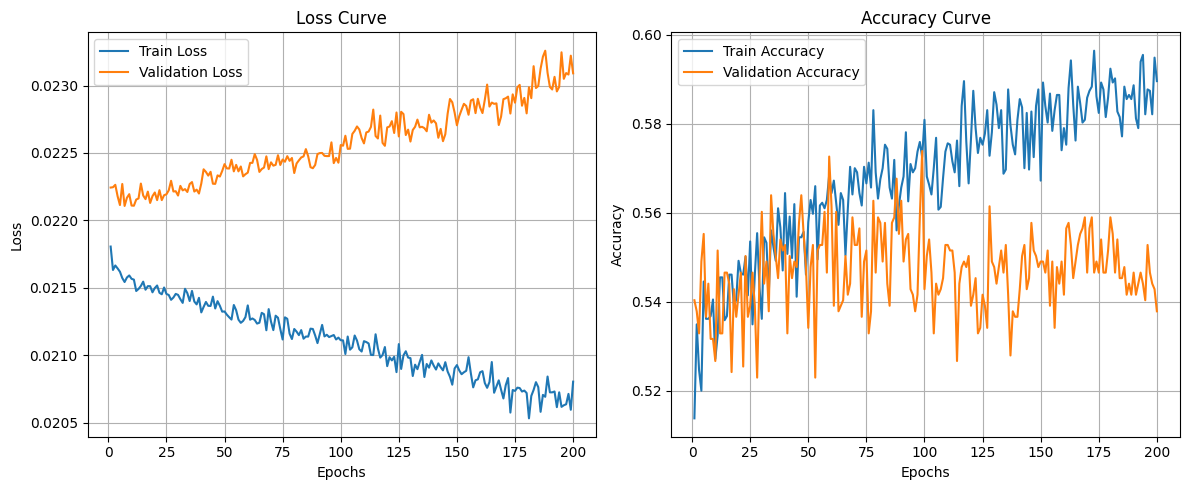

In [8]:
epochs_range = list(range(1, epochs + 1))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
axs[0].plot(epochs_range, train_losses, label="Train Loss")
axs[0].plot(epochs_range, val_losses, label="Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss Curve")
axs[0].legend()
axs[0].grid(True)

# Plot Accuracy
axs[1].plot(epochs_range, train_accuracies, label="Train Accuracy")
axs[1].plot(epochs_range, val_accuracies, label="Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy Curve")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
